In [8]:
# コード補完
%config IPCompleter.greedy=True


from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

x = iris.data[:, [2, 3]]

y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
from sklearn .preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(x_train)
#　標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
y_pred = ppn.predict(x_test_std)

print((y_test != y_pred).sum())

1


In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [14]:
print(ppn.score(x_test_std, y_test))

0.9777777777777777


In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_desicion_regions(x, y, classifier, test_index=None, resolution=0.02):
    marker = ('s', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() -1, x[:,0].max() +1
    x2_min, x2_max = x[:, 1].min() -1, x[:,1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,z,alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl, in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl, 1], alpha = 0.8, c=colors[idx], marker= marker[idx], label=cl, edgecolor = 'black')
        
    if test_index :
        x_test, y_test = x[test_index, :], y[test_index]
        plt.scatter(x_test[:, 0], x_test[:, 1], edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        

/var/folders/3f/_t9zn80d4mq8zs07f06303jc0000gn/T/ipykernel_4275/2122163337.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = x[y == cl, 0], y = x[y == cl, 1], alpha = 0.8, c=colors[idx], marker= marker[idx], label=cl, edgecolor = 'black')


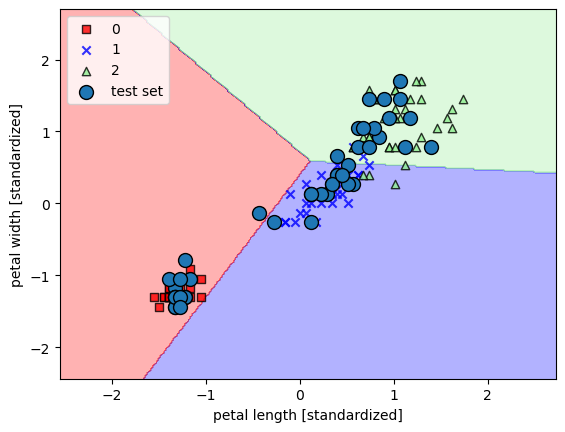

In [48]:
x_conbined_std = np.vstack((x_train_std, x_test_std))
y_combied_std = np.hstack((y_train, y_test))

plot_desicion_regions(x=x_conbined_std, y= y_combied_std, classifier=ppn, test_index=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')
plt.show()

In [52]:
def sigmoid(z):
    return 1.0/(1+ np.exp(-z))

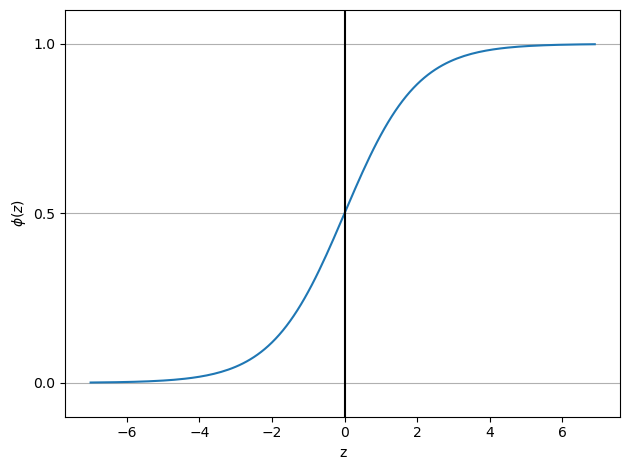

In [53]:
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)
plt.plot(z, phi_z)
# 垂直線を追加
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()

plt.show()

In [54]:
def cost_1(z):
    return - np.log(sigmoid(z))

In [55]:
def cost_0(z):
    return - np.log(1 - sigmoid(z))

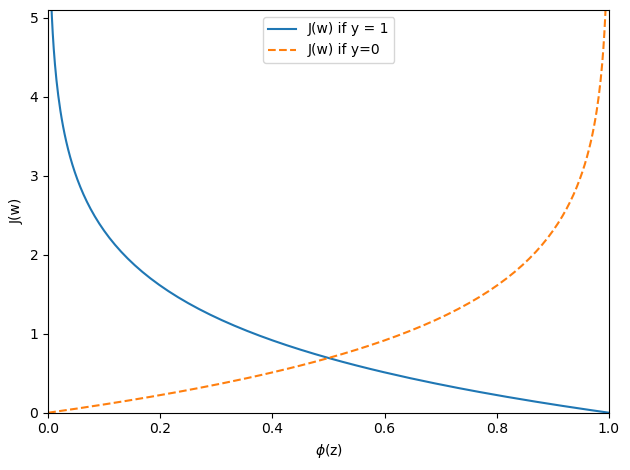

In [57]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

# y=1のコストを計算
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y = 1')

#  y=０のコストを計算
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0,1])

plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

plt.legend(loc='upper center')

plt.tight_layout()

plt.show()